In [ ]:
import pandas as pd
import numpy as np
input_file = "/Users/jacquelinezhu/Desktop/SleepdB/acoustic_project/codes/AcousticFeatures_April16_May14_sahh.xlsx"
df = pd.read_excel(input_file).dropna(how='all')
X = df.loc[:, 'shEnt':'PXX_diff_SMA'].values
y = df['AHI_scaled'].values

In [25]:
params = {
    'n_estimators': 75,       # more trees to reduce variance
    'max_depth': 2,            # control tree complexity to avoid overfitting
    'min_samples_split': 5,   # minimum samples needed to split a node
    'min_samples_leaf': 1,    # minimum samples needed at a leaf node
    'max_features': 'log2',    # number of features to consider at each split
    'random_state': 42,
    'n_jobs': -1               # use all CPU cores to speed up training
}

In [26]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import LeaveOneOut
import numpy as np

cv = LeaveOneOut()
y_true, y_pred = [], []

for i,j in cv.split(X):
    X_train, X_test = X[i,:],X[j,:]
    y_train, y_test = y[i], y[j]

    model=RandomForestRegressor(**params)
    model.fit(X_train,y_train)
    yhat = model.predict(X_test)

    y_true.append(y_test[0])
    y_pred.append(yhat[0])

y_true = np.array(y_true)
y_pred = np.array(y_pred)

In [27]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_true, y_pred)
print(mse)

1.0170369541804325


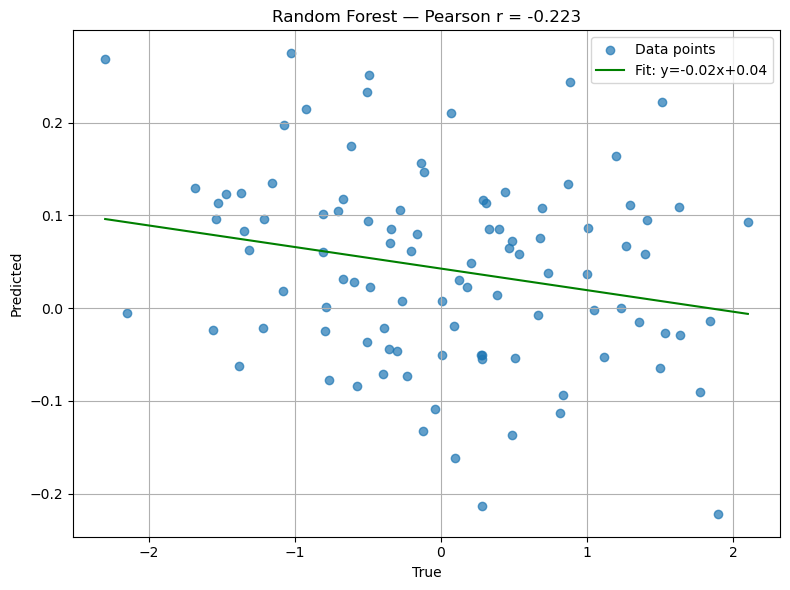

In [28]:
import matplotlib.pyplot as plt
from scipy.stats import linregress, pearsonr

slope, intercept, r_value, p_value, std_err = linregress(y_true, y_pred)
line_x = np.linspace(y_true.min(), y_true.max(), 100)
line_y = slope * line_x + intercept

corr, _ = pearsonr(y_true, y_pred)

plt.figure(figsize=(8, 6))
plt.scatter(y_true, y_pred, alpha=0.7, label="Data points")
plt.plot(line_x, line_y, 'g-', label=f"Fit: y={slope:.2f}x+{intercept:.2f}")
plt.xlabel("True")
plt.ylabel("Predicted")
plt.title(f"Random Forest — Pearson r = {corr:.3f}")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


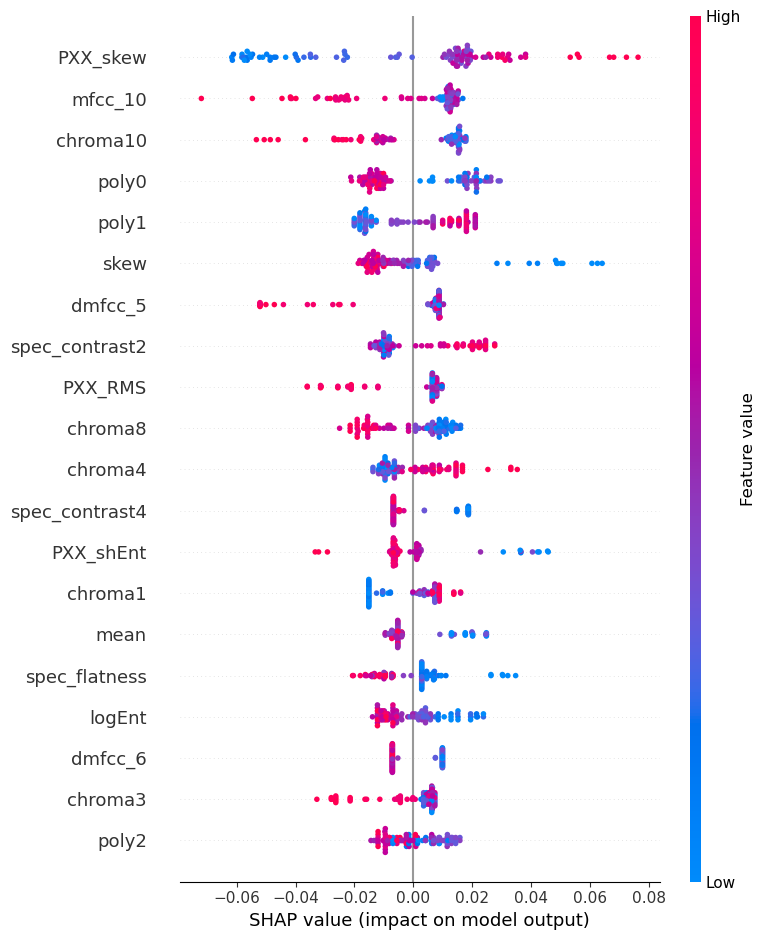

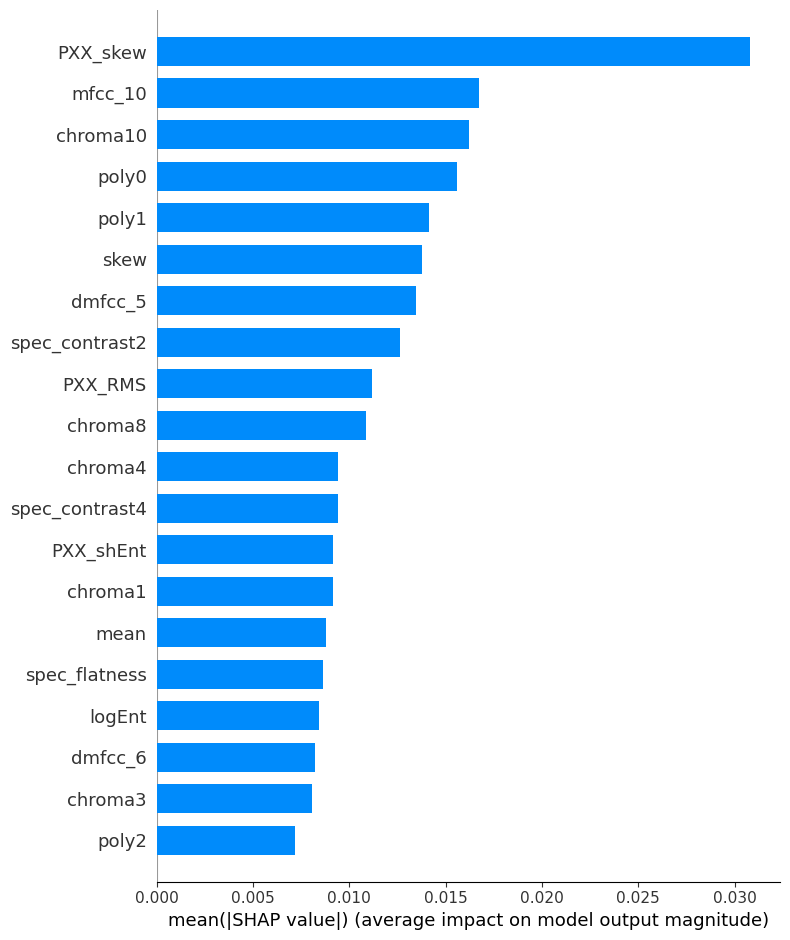

'feature_names = df.loc[:, \'shEnt\':\'PXX_diff_SMA\'].columns\nshap_importance = np.abs(shap_values.values).mean(axis=0)\nshap_df = pd.DataFrame({\n    "feature": feature_names,\n    "mean_abs_shap": shap_importance\n}).sort_values("mean_abs_shap", ascending=False).reset_index(drop=True)\n\noutput_file = "sahh_shap_importance.xlsx"\nshap_df.to_excel(output_file, index=False)'

In [30]:
import shap

# Create SHAP explainer
explainer = shap.Explainer(model, X)
shap_values = explainer(X)

# Summary plot (global importance)
shap.summary_plot(shap_values, X, feature_names=df.loc[:, 'shEnt':'PXX_diff_SMA'].columns)
shap.summary_plot(shap_values, X, feature_names=df.loc[:, 'shEnt':'PXX_diff_SMA'].columns, plot_type="bar")


'''feature_names = df.loc[:, 'shEnt':'PXX_diff_SMA'].columns
shap_importance = np.abs(shap_values.values).mean(axis=0)
shap_df = pd.DataFrame({
    "feature": feature_names,
    "mean_abs_shap": shap_importance
}).sort_values("mean_abs_shap", ascending=False).reset_index(drop=True)

output_file = "sahh_shap_importance.xlsx"
shap_df.to_excel(output_file, index=False)'''
